# Lab 2
Le domaine spatiale

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage import color
from scipy import signal
import random

## Exercice 1
Créer un filtre 5x5 linéaire avec les distances Tchebychev à partir du centre.

<img src="distance tchebychev.PNG"
     alt="Error can't fetch img"
     style="float: left" />
     
> Défi: À l'aide de numpy,  
> faite le en moins de 4 lignes

> Indices:  
> \- `np.full()`  
> \- `np.ones()`  
> \- `np.zeros()`  
> \- les *slices*

[[2 2 2 2 2]
 [2 1 1 1 2]
 [2 1 0 1 2]
 [2 1 1 1 2]
 [2 2 2 2 2]]


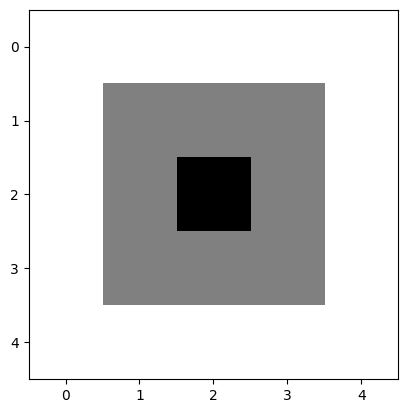

In [5]:
tchebychev = np.full((5,5), 2)
tchebychev[1:-1, 1:-1] = tchebychev[1:-1, 1:-1] - np.ones((3,3))
tchebychev[2, 2] = tchebychev[2,2] - 1
print(tchebychev)

plt.imshow(tchebychev, cmap="grey")
plt.show()

## Exercice 2
Créer un histogramme des intensités dans le filtre au premier exercice.
> Utiliser `ndarray.flatten()` et `plt.hist()`

> Défi: Ajouter un titre et des *labels* sur les axes.

[2 2 2 2 2 2 1 1 1 2 2 1 0 1 2 2 1 1 1 2 2 2 2 2 2]


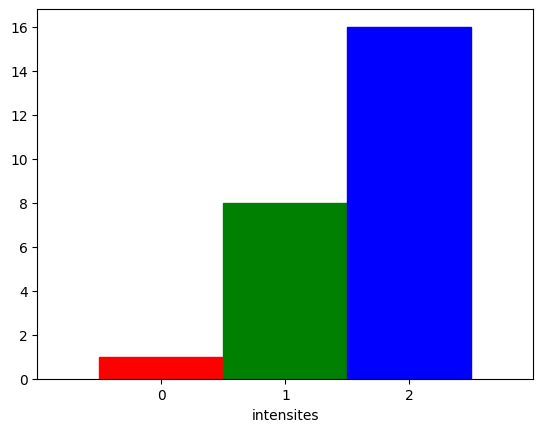

In [16]:
tchebychev_hist = tchebychev.flatten()

COLORS = ['r', 'g', 'b']
print(tchebychev_hist)
bins = np.arange(4) -0.5

_, _, bar = plt.hist(tchebychev_hist,bins=bins)
for i in range(3):
    bar[i].set_color(COLORS[i])
plt.xlim([-1,3])
plt.xticks([0,1,2])
plt.xlabel( 'intensites')
plt.show()

## Exercice 3
Créer un filtre linéaire 5x5 avec les distances Euclidienne à partir du centre.

<img src="distance euclidienne.PNG"
     alt="Error can't fetch img"
     style="float: left" />

In [20]:
eucli = np.zeros((5,5))

centre = (2,2)

for i in range(5):
    for j in range(5):
        value = np.sqrt(np.pow( i - centre[0] ,2) + np.pow( j - centre[1], 2))
        eucli[i,j] = value

print(eucli)

[[2.82842712 2.23606798 2.         2.23606798 2.82842712]
 [2.23606798 1.41421356 1.         1.41421356 2.23606798]
 [2.         1.         0.         1.         2.        ]
 [2.23606798 1.41421356 1.         1.41421356 2.23606798]
 [2.82842712 2.23606798 2.         2.23606798 2.82842712]]


## Exercice 4
Inversé l'intensité des pixels dans le filtre euclidien au numéro précédent.

> Le résultat ressemble à un filtre Gaussien

[[0.         0.59235915 0.82842712 0.59235915 0.        ]
 [0.59235915 1.41421356 1.82842712 1.41421356 0.59235915]
 [0.82842712 1.82842712 2.82842712 1.82842712 0.82842712]
 [0.59235915 1.41421356 1.82842712 1.41421356 0.59235915]
 [0.         0.59235915 0.82842712 0.59235915 0.        ]]


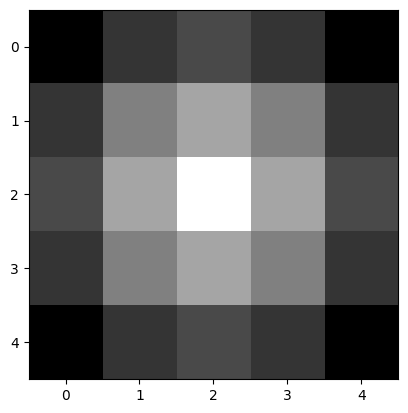

In [24]:
max_eucli = np.max(eucli)

inverse_eucli = max_eucli - eucli
print(inverse_eucli)

plt.imshow(inverse_eucli, cmap='grey')
plt.show()

## Exercice 5
Qu'elle est la différence entre l'application d'une convolution versus une corrélation?

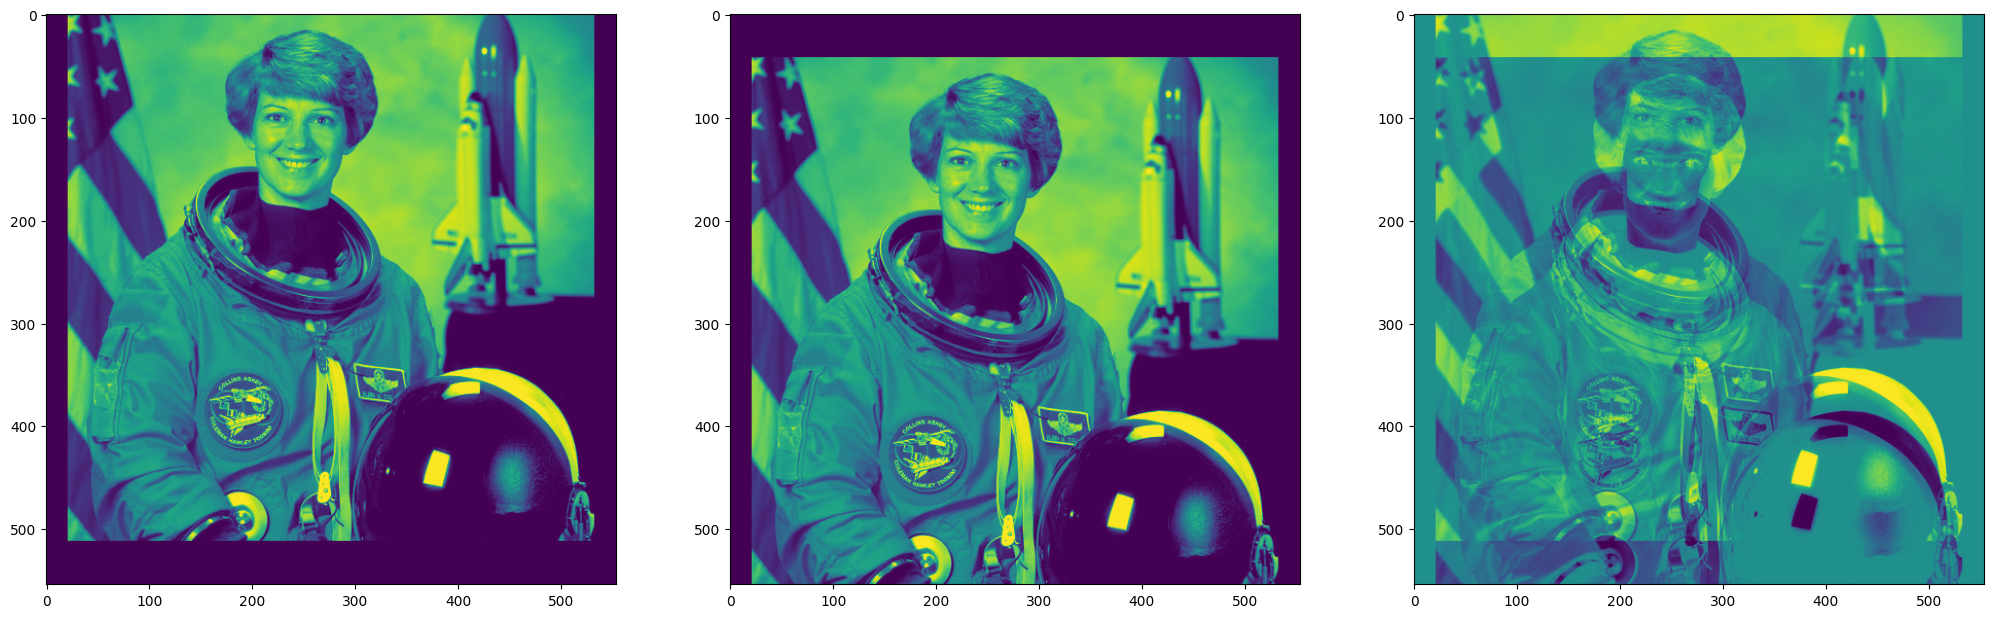

In [28]:
# Pour tester
img = color.rgb2gray(data.astronaut())
kernel = np.array([[0,1,0],[0,0,0],[0,0,0]])

conv = signal.convolve2d(img, kernel)
corr = signal.correlate2d(img, kernel)

for i in range(20): 
    conv = signal.convolve2d(conv, kernel)
    corr = signal.correlate2d(corr, kernel)
diff = conv - corr

_, ax = plt.subplots(1,3, figsize=(25,25))
ax[0].imshow(conv)
ax[1].imshow(corr)
ax[2].imshow(diff)

plt.show()

## Exercice 6
Implémenter et appliquer un filtre médian afin de restorer l'image dans `img`.
> Compléter les sections TODO

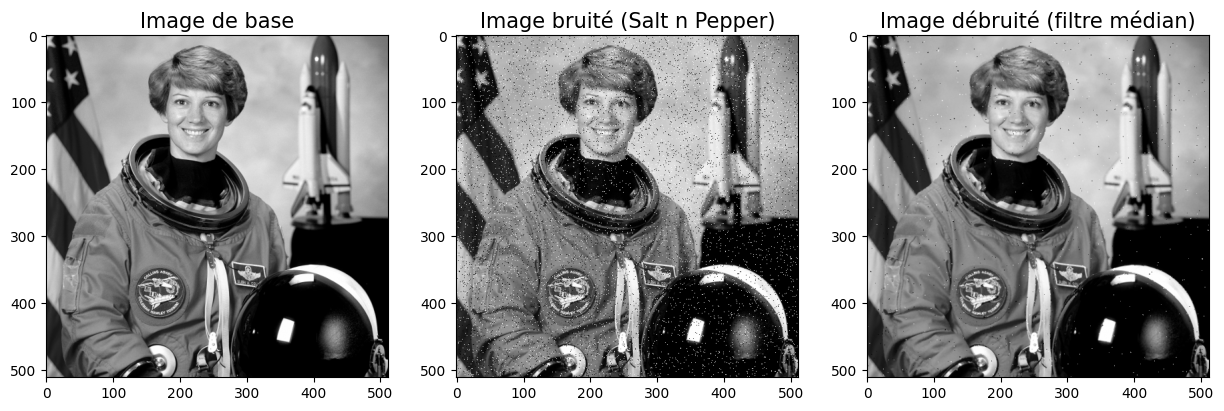

In [29]:
# Add salt and pepper noise
plt.figure(figsize=(15,15))

plt.subplot(131)
plt.title('Image de base', fontsize=15)

# Get image
img = color.rgb2gray(data.astronaut())

plt.imshow(img, cmap='gray')

plt.subplot(132)
plt.title('Image bruité (Salt n Pepper)', fontsize=15)

# Add salt n pepper noise to img
nb_pixel = img.shape[0] * img.shape[1]
noise_p = 0.025

# salt
for i in range(round(nb_pixel * noise_p)):
    x = random.randint(0, img.shape[0]-1)
    y = random.randint(0, img.shape[1]-1)
    img[x, y] = 1

# pepper
for i in range(round(nb_pixel * noise_p)):
    x = random.randint(0, img.shape[0]-1)
    y = random.randint(0, img.shape[1]-1)
    img[x, y] = 0

plt.imshow(img, cmap='gray')

plt.subplot(133)
plt.title('Image débruité (filtre médian)', fontsize=15)

# Padding
padding = np.zeros((img.shape[0] + 2, img.shape[1] + 2))
padding[1:-1, 1:-1] = img
for i in range(1, padding.shape[0]-1):
    for j in range(1, padding.shape[1]-1):
        values = padding[i-1: i +1, j-1: j + 1]
        median = np.median(values)
        img[i-1,j-1] = median

# Apply median filter on img using padding
# TODO

plt.imshow(img, cmap='gray')

plt.show()

## Exercice 7
Quiz sur différent résultat de convolution?

Ellipsis

## Extra
Pour ceux qui on de la misère à comprendre comment et pourquoi faire de l'égalisation d'histogramme:
- [Comment: vidéo youtube](https://www.youtube.com/watch?v=PD5d7EKYLcA)
- [Exemple/Pourquoi: notebook sur Github](https://github.com/MubashirullahD/diplab06/blob/master/Histogram%20Equalization.ipynb)